In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.patches as mpatches
import os
import math
import random
from scipy.stats import ranksums
from scipy.stats import chi2_contingency

In [2]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"
def position_name_RNA(cluster):
    return (pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==cluster]['nCount_RNA'].quantile([0.75]).iloc[0])+1.5*(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==cluster]['nCount_RNA'].quantile([0.75]).iloc[0]-pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==cluster]['nCount_RNA'].quantile([0.25]).iloc[0])
def position_name_ATAC(cluster):
    return (pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==cluster]['nCount_peaks'].quantile([0.75]).iloc[0])+1.5*(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==cluster]['nCount_peaks'].quantile([0.75]).iloc[0]-pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==cluster]['nCount_peaks'].quantile([0.25]).iloc[0])

In [3]:
import numpy as np
import seaborn as sns
from statsmodels.nonparametric.smoothers_lowess import lowess


def regplot_lowess_ci(data, x, y, ci_level, n_boot, **kwargs):
    x_ = data[x].to_numpy()
    y_ = data[y].to_numpy()
    x_grid = np.linspace(start=x_.min(), stop=x_.max(), num=1000)

    def reg_func(_x, _y):
        return lowess(exog=_x, endog=_y, xvals=x_grid,frac=0.3)

    beta_boots = sns.algorithms.bootstrap(
        x_, y_,
        func=reg_func,
        n_boot=n_boot,
    )
    err_bands = sns.utils.ci(beta_boots, ci_level, axis=0)
    y_plt = reg_func(x_, y_)

    ax = sns.lineplot(x=x_grid, y=y_plt, **kwargs)
    sns.scatterplot(x=x_, y=y_, ax=ax, **kwargs)
    ax.fill_between(x_grid, *err_bands, alpha=.15, **kwargs)
    return ax

In [4]:
pseudo_time_all_info=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/ATAC/combined_peaks/no_cell_removal/pseudotime/pseudotime_and_others.txt",sep=",")
pseudo_time_all_info_germline=pseudo_time_all_info.dropna()

/tmp/ipykernel_3085595/14897332.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_time_all_info_germline['l2counts_peaks']=np.log2(pseudo_time_all_info_germline['nCount_peaks'].astype(int)+1)
/tmp/ipykernel_3085595/14897332.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseudo_time_all_info_germline['l2counts_RNA']=np.log2(pseudo_time_all_info_germline['nCount_RNA'].astype(int)+1)


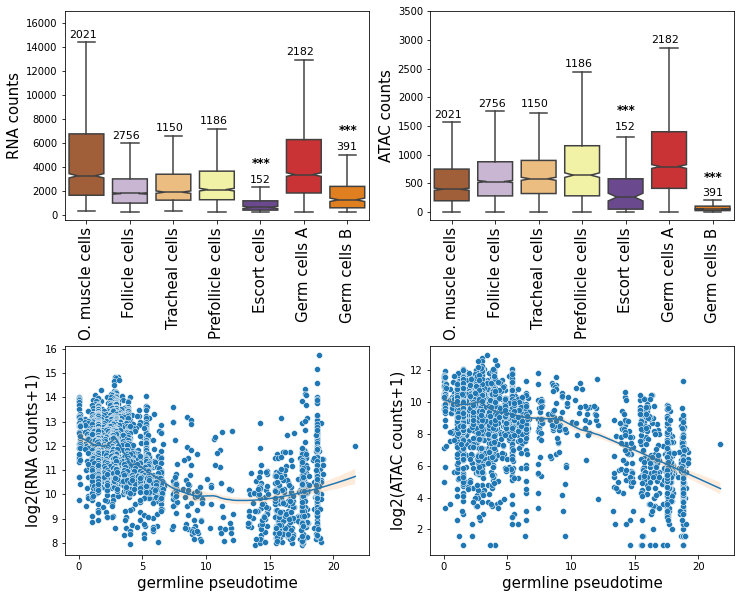

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 10), gridspec_kw={'hspace':0.6})
my_pal ={0:'#cab2d6',1:'#e31a1c',2:'#b15928',3:'#6a3d9a',4:'#fdbf6f',5:'#ffff99',6:'#ff7f00'}
plt.subplot(2,2,1)
sns.boxplot(x='seurat_clusters', y='nCount_RNA', data=pseudo_time_all_info,showfliers=False,order=[2,0,4,5,3,1,6],palette=my_pal,notch=True)
plt.ylabel("RNA counts",fontsize=15)
plt.ylim(ymax=17000)
axes[0,0].text(-0.4, position_name_RNA(2)+1000, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==2]),fontsize=11, va='top')
axes[0,0].text(-0.4+1, position_name_RNA(0)+1000, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==0]),fontsize=11, va='top')
axes[0,0].text(-0.4+2, position_name_RNA(4)+1000, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==4]),fontsize=11, va='top')
axes[0,0].text(-0.4+3, position_name_RNA(5)+1000, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==5]),fontsize=11,va='top')
axes[0,0].text(-0.4+4.15,position_name_RNA(3)+1000, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==3]),fontsize=11,va='top')
axes[0,0].text(-0.4+5, position_name_RNA(1)+1000, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==1]),fontsize=11, va='top')
axes[0,0].text(-0.4+6.15,position_name_RNA(6)+1000, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==6]),fontsize=11, va='top')
#axes[0,0].text(2.8,position_name_RNA(5)+2500 ,convert_pvalue_to_asterisks(ranksums(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([5])]['nCount_RNA'],pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([2,0,4])]['nCount_RNA'],alternative='less').pvalue),fontsize=12, fontweight='bold', va='top')
axes[0,0].text(2.8+1,position_name_RNA(3)+2500 ,convert_pvalue_to_asterisks(ranksums(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([3])]['nCount_RNA'],pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([2,0,4])]['nCount_RNA'],alternative='less').pvalue),fontsize=12, fontweight='bold', va='top')
#axes[0,0].text(2.8+2,position_name_RNA(1)+2500 ,convert_pvalue_to_asterisks(ranksums(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([1])]['nCount_RNA'],pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([2,0,4])]['nCount_RNA'],alternative='less').pvalue),fontsize=12, fontweight='bold', va='top')
axes[0,0].text(2.8+3,position_name_RNA(6)+2500 ,convert_pvalue_to_asterisks(ranksums(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([6])]['nCount_RNA'],pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([2,0,4])]['nCount_RNA'],alternative='less').pvalue),fontsize=12, fontweight='bold', va='top')
region = ['O. muscle cells','Follicle cells','Tracheal cells','Prefollicle cells','Escort cells','Germ cells A','Germ cells B']
axes[0,0].set_xticks(np.arange(0,7), region,rotation = 90,fontsize=15)
axes[0,0].set_xlabel(' ')
plt.subplot(2,2,2)
sns.boxplot(x='seurat_clusters', y='nCount_peaks', data=pseudo_time_all_info,showfliers=False,order=[2,0,4,5,3,1,6],palette=my_pal,notch=True)
plt.ylabel("ATAC counts",fontsize=15)
region = ['O. muscle cells','Follicle cells','Tracheal cells','Prefollicle cells','Escort cells','Germ cells A','Germ cells B']
axes[0,1].set_xticks(np.arange(0,7), region,rotation = 90,fontsize=15)
axes[0,1].text(-0.4, position_name_ATAC(2)+200, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==2]),fontsize=11, va='top')
axes[0,1].text(-0.4+1, position_name_ATAC(0)+200, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==0]),fontsize=11, va='top')
axes[0,1].text(-0.4+2, position_name_ATAC(4)+200, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==4]),fontsize=11, va='top')
axes[0,1].text(-0.4+3, position_name_ATAC(5)+200, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==5]),fontsize=11,va='top')
axes[0,1].text(-0.4+4.15,position_name_ATAC(3)+200, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==3]),fontsize=11,va='top')
axes[0,1].text(-0.4+5, position_name_ATAC(1)+200, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==1]),fontsize=11, va='top')
axes[0,1].text(-0.4+6.15,position_name_ATAC(6)+200, len(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters']==6]),fontsize=11, va='top')
#axes[0,1].text(2.8,position_name_ATAC(5)+500 ,convert_pvalue_to_asterisks(ranksums(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([5])]['nCount_peaks'],pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([2,0,4])]['nCount_peaks'],alternative='less').pvalue),fontsize=12, fontweight='bold', va='top')
axes[0,1].text(2.8+1,position_name_ATAC(3)+500 ,convert_pvalue_to_asterisks(ranksums(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([3])]['nCount_peaks'],pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([2,0,4])]['nCount_peaks'],alternative='less').pvalue),fontsize=12, fontweight='bold', va='top')
#axes[0,1].text(2.8+2,position_name_ATAC(1)+500 ,convert_pvalue_to_asterisks(ranksums(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([1])]['nCount_peaks'],pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([2,0,4])]['nCount_peaks'],alternative='less').pvalue),fontsize=12, fontweight='bold', va='top')
axes[0,1].text(2.8+3,position_name_ATAC(6)+500 ,convert_pvalue_to_asterisks(ranksums(pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([6])]['nCount_peaks'],pseudo_time_all_info[pseudo_time_all_info['seurat_clusters'].isin([2,0,4])]['nCount_peaks'],alternative='less').pvalue),fontsize=12, fontweight='bold', va='top')
plt.ylim(ymax=3500)
axes[0,1].set_xlabel(' ')
pseudo_time_all_info_germline['l2counts_peaks']=np.log2(pseudo_time_all_info_germline['nCount_peaks'].astype(int)+1)
pseudo_time_all_info_germline['l2counts_RNA']=np.log2(pseudo_time_all_info_germline['nCount_RNA'].astype(int)+1)
plt.subplot(2,2,3)
mpg_df = pseudo_time_all_info_germline[(pseudo_time_all_info_germline['germline_pseudotime']<10000)]
#ax = regplot_lowess_ci(mpg_df, x='l2counts', y='germline_pseudotime', ci_level=99, n_boot=10)
ax = regplot_lowess_ci(mpg_df, x='germline_pseudotime', y='l2counts_RNA', ci_level=95, n_boot=100)
axes[1,0].set_xlabel("germline pseudotime",fontsize=15)
axes[1,0].set_ylabel("log2(RNA counts+1)",fontsize=15)
plt.subplot(2,2,4)
#mpg_df = pseudo_time_all_info_germline[(pseudo_ATAC['germline_pseudotime']<10000)]
#ax = regplot_lowess_ci(mpg_df, x='l2counts', y='germline_pseudotime', ci_level=99, n_boot=10)
ax = regplot_lowess_ci(mpg_df, x='germline_pseudotime', y='l2counts_peaks', ci_level=95, n_boot=100)
axes[1,1].set_xlabel("germline pseudotime",fontsize=15)
axes[1,1].set_ylabel("log2(ATAC counts+1)",fontsize=15)
plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/RNA_and_ATAC_counts_multiome_v2.png',bbox_inches='tight',facecolor='white')